In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import seaborn as sns

Using TensorFlow backend.


#  Model deployment

In [2]:
#Defining paths
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#Getting parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

# Training data 

In [5]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
#Training the model
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
8/8 [==============================] - 309s 39s/step - loss: 1.3419 - accuracy: 0.5000 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 284s 36s/step - loss: 0.5642 - accuracy: 0.7422 - val_loss: 0.5482 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 283s 35s/step - loss: 0.4420 - accuracy: 0.7773 - val_loss: 0.5556 - val_accuracy: 0.6833
Epoch 4/10
8/8 [==============================] - 281s 35s/step - loss: 0.3123 - accuracy: 0.8828 - val_loss: 0.2334 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 269s 34s/step - loss: 0.2950 - accuracy: 0.8945 - val_loss: 0.2731 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 288s 36s/step - loss: 0.2450 - accuracy: 0.8945 - val_loss: 0.2020 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 284s 36s/step - loss: 0.1954 - accuracy: 0.9141 - val_loss: 0.

In [10]:
#Getting summary
summary=hist_new.history
print(summary)

{'val_loss': [0.6833785772323608, 0.5482252240180969, 0.5555626153945923, 0.2333684116601944, 0.27307453751564026, 0.20197966694831848, 0.18693891167640686, 0.021789537742733955, 0.10203265398740768, 0.08863873034715652], 'val_accuracy': [0.5, 0.75, 0.6833333373069763, 0.9666666388511658, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053, 0.9833333492279053, 0.9666666388511658], 'loss': [1.3419150486588478, 0.5641519725322723, 0.4420112110674381, 0.31229099817574024, 0.29503222554922104, 0.2449696622788906, 0.19542875979095697, 0.1363976327702403, 0.22474780678749084, 0.14877958223223686], 'accuracy': [0.5, 0.7421875, 0.77734375, 0.8828125, 0.89453125, 0.89453125, 0.9140625, 0.94921875, 0.93359375, 0.94140625]}


In [11]:
model.save("model_covid.h5")

In [21]:
model.evaluate_generator(train_generator)

[0.11735779047012329, 0.9598214030265808]

In [22]:
print(model.evaluate_generator(validation_generator))

[0.12348507344722748, 0.9666666388511658]


## Confusion Matrix

In [23]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [24]:
y_actual, y_test = [],[]

In [25]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

In [26]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [27]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

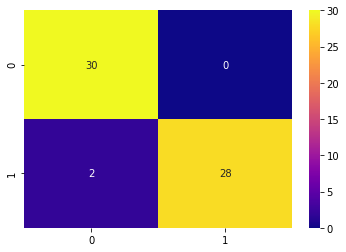

In [29]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal